# **Updating data types**

- Luckily, the dot-astype function allows us to change data types without too much effort. 
- Here, we redefine the year column by selecting the column and calling the dot-astype method, indicating we'd like to change the column to an integer. 
- Then we use the dot-dtypes attribute to check that the year column data is now stored as integers - and it is!

In [ ]:
# Convert the 'year' column to integer type
books["year"] = books["year"].astype(int)

# Display the data types of all columns in the DataFrame
books.dtypes

In [ ]:
name        object
author      object
rating     float64
year        int64
genre       object
dtype: object

In [ ]:
Updating data types

| Type       | Python Name  |
|------------|--------------|
| String     | `str`        |
| Integer    | `int`        |
| Float      | `float`      |
| Dictionary | `dict`       |
| List       | `list`       |
| Boolean    | `bool`       |

# **Validating categorical data**

- We can validate categorical data by comparing values in a column to a list of expected values using dot-isin, which can either be applied to a Series as we'll show here or to an entire DataFrame. 
- Let's check whether the values in the genre column are limited to "Fiction" and "Non Fiction" by passing these genres as a list of strings to dot-isin. 
- The function returns a Series of the same size and shape as the original but with True and False in place of all values, depending on whether the value from the original Series was included in the list passed to dot-isin.
- We can see that some values are False.

In [ ]:
books["genre"].isin(["Fiction", "Non Fiction"])

In [ ]:
0     True
1     True
2     True
3     True
4    False
...
345    True
346    True
347    True
348    True
349   False
Name: genre, Length: 350, dtype: bool

- We can also use the tilde operator at the beginning of the code block to invert the True/ False values so that the function returns True if the value is NOT in the list passed to dot-isin.

In [ ]:
~books["genre"].isin(["Fiction", "Non Fiction"])

In [ ]:
0	False
1	False
2	False
3	False
4	True
...
345	False
346	False
347	False
348	False
349	True
Name: genre, Length: 350, dtype: bool

- And if we're interested in filtering the DataFrame for only values that are in our list, we can use the isin code we just wrote to filter using Boolean indexing!

In [ ]:
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

In [ ]:
                             name |              author | rating | year |       genre |
--|-------------------------------|---------------------|--------|------|-------------|
0 | 10-Day Green Smoothie Cleanse |            JJ Smith |    4.7 | 2016 | Non Fiction |
1 | 11/22/63: A Novel             |        Stephen King |    4.6 | 2011 |     Fiction |
2 | 12 Rules for Life             |  Jordan B. Peterson |    4.7 | 2018 | Non Fiction |
3 | 1984 (Signet Classics)        | George Orwell       |    4.7 | 2017 |     Fiction |
5 | A Dance with Dragons          | George R. R. Martin |    4.4 | 2011 |     Fiction |

# **Validating numerical data**

In [ ]:
books.select_dtypes("number").head()

In [ ]:
|   |rating | year |
|---|-------|------|
| 0 |   4.7 | 2016 |
| 1 |   4.6 | 2011 |
| 2 |   4.7 | 2018 |
| 3 |   4.7 | 2017 |
| 4 |   4.8 | 2019 |

- Perhaps we'd like to know the range of years in which the books in our dataset were published. 
- We can check the lowest and highest years by using the dot-min and dot-max functions, respectively. 
- And we can view a more detailed picture of the distribution of year data using Seaborn's boxplot function. 
- The boxplot shows the boundaries of each quartile of year data: as we saw using min and max, the lowest year is 2009 and the highest year is 2019. 
- The 25th and 75th percentiles are 2010 and 2016 and the median year is 2013.

In [ ]:
books["year"].min()

2009

books["year"].max()

2019

In [ ]:
sns.boxplot(data=books, x="year")
plt.show()  

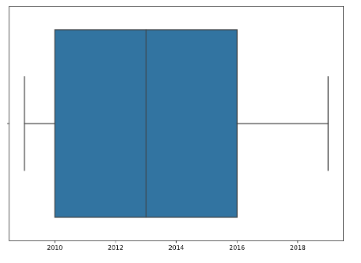

- We can also view the year data grouped by a categorical variable such as genre by setting the y keyword argument. 
- It looks like the children's books in our dataset have slightly later publishing years in general, but the range of years is the same for all genres.

In [ ]:
sns.boxplot(data=books, x="year", y="genre")

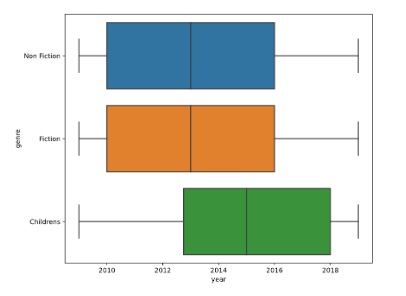